In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def convert_string_to_int(s):
    return int(s.replace(',',''))

def convert_yes_no(s):
    if s =='YES':
        return True
    elif s == 'NO':
        return False
    elif pd.isnull(s):
        return np.nan
    raise ValueError

def process_csv(fname):
    df = pd.read_csv(fname)
    df2 = pd.merge(df[df.columns[2:6]].applymap(convert_string_to_int),
             df[df.columns[6:8]].applymap(convert_yes_no),
             left_index = True,right_index=True)
    df2.columns = ['AT','BT','AH','BH','AB','BB']
    df2['Mult'] = df['Multiplier']
    
    df2.loc[0,'AB'] = False
    df2.loc[0,'BB'] = False
    
    df2['AM'] = df2['AB'] * df2['Mult'] + ( 1 - df2['AB']) * 1.0
    df2['BM'] = df2['BB'] * df2['Mult'] + ( 1 - df2['BB']) * 1.0

    df2['AR'] = df2['AH'] / df2['AM'].shift()
    df2['BR'] = df2['BH'] / df2['BM'].shift()
    
    return df2

In [3]:
df = process_csv('(July 2018) FEH Voting Gauntlet_ Fated Battles - Marth vs Hardin.csv')

In [4]:
df

,AT,BT,AH,BH,AB,BB,Mult,AM,BM,AR,BR
0,0,0,0,0,False,False,3.1,1,1,NaN,NaN
1,8981468,6714686,8981468,6714686,False,True,3.2,1,3.2,8.98147e+06,6.71469e+06
2,21965602,98377570,12984134,91662884,True,False,3.3,3.3,1,1.29841e+07,2.86447e+07
3,155866032,112018252,133900430,13640682,False,True,3.4,1,3.4,4.05759e+07,1.36407e+07
4,172244388,252902693,16378356,140884441,True,False,3.5,3.5,1,1.63784e+07,4.14366e+07
5,363681729,272794664,191437341,19891971,False,True,3.6,1,3.6,5.46964e+07,1.9892e+07
6,387702714,495521368,24020985,222726704,True,False,3.7,3.7,1,2.4021e+07,6.18685e+07
7,646273027,521507014,258570313,25985646,False,True,3.8,1,3.8,6.98839e+07,2.59856e+07
8,672391758,758513303,26118731,237006289,True,False,3.9,3.9,1,2.61187e+07,6.23701e+07
9,939157848,781000170,266766090,22486867,False,True,4.0,1,4,6.84016e+07,2.24869e+07


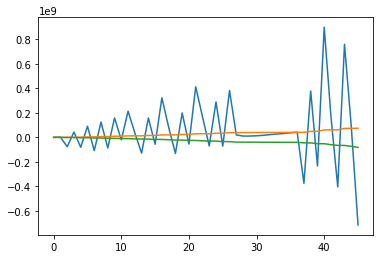

In [5]:
plt.plot(df['AT'] - df['BT'])
plt.plot(df['AT']*0.01)
plt.plot(-df['BT']*0.01)
plt.show()

In [6]:
df['AM'] = df['AB'] * df['Mult'] + ( 1 - df['AB']) * 1.0
df['BM'] = df['BB'] * df['Mult'] + ( 1 - df['BB']) * 1.0

In [7]:
df['AR'] = df['AH'] / df['AM'].shift()
df['BR'] = df['BH'] / df['BM'].shift()

In [8]:
df

,AT,BT,AH,BH,AB,BB,Mult,AM,BM,AR,BR
0,0,0,0,0,False,False,3.1,1,1,NaN,NaN
1,8981468,6714686,8981468,6714686,False,True,3.2,1,3.2,8.98147e+06,6.71469e+06
2,21965602,98377570,12984134,91662884,True,False,3.3,3.3,1,1.29841e+07,2.86447e+07
3,155866032,112018252,133900430,13640682,False,True,3.4,1,3.4,4.05759e+07,1.36407e+07
4,172244388,252902693,16378356,140884441,True,False,3.5,3.5,1,1.63784e+07,4.14366e+07
5,363681729,272794664,191437341,19891971,False,True,3.6,1,3.6,5.46964e+07,1.9892e+07
6,387702714,495521368,24020985,222726704,True,False,3.7,3.7,1,2.4021e+07,6.18685e+07
7,646273027,521507014,258570313,25985646,False,True,3.8,1,3.8,6.98839e+07,2.59856e+07
8,672391758,758513303,26118731,237006289,True,False,3.9,3.9,1,2.61187e+07,6.23701e+07
9,939157848,781000170,266766090,22486867,False,True,4.0,1,4,6.84016e+07,2.24869e+07


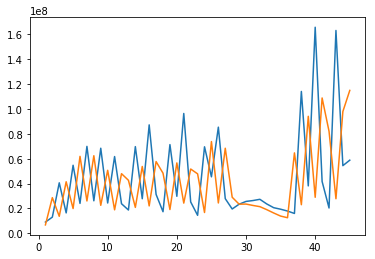

In [9]:
plt.plot(df['AR'])
plt.plot(df['BR'])

In [10]:
import os
df_dict = {}
for name in os.listdir():
    if name.endswith('csv'):
        left,vs,right=name.split('.')[0].split('-')[1].split(' ')[1:]
        vname = f'{left}Vs{right}'
        df = process_csv(name)
        globals()[vname] = df
        df_dict[vname] = df

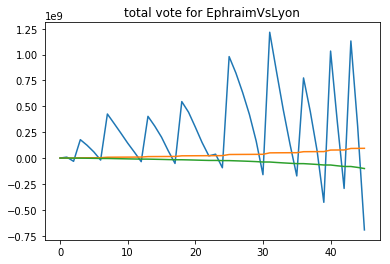

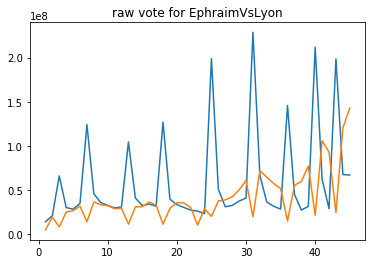

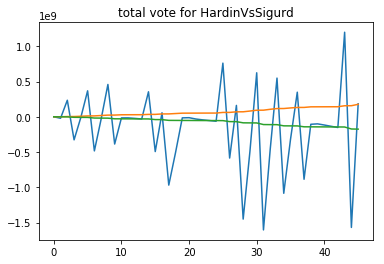

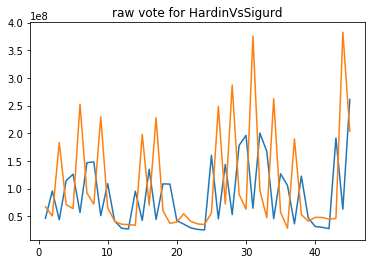

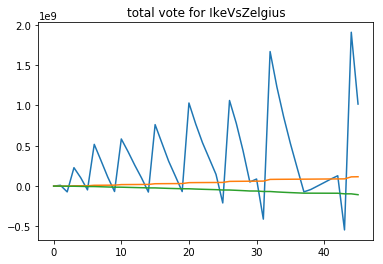

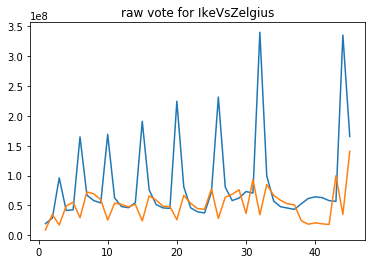

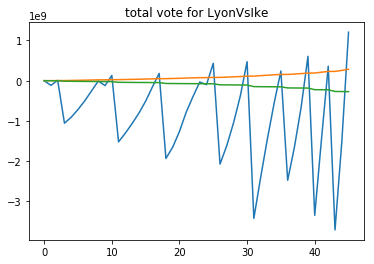

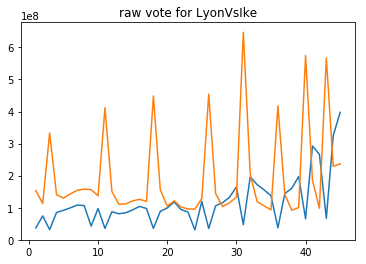

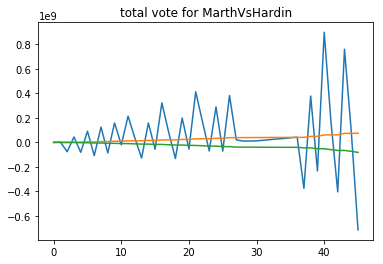

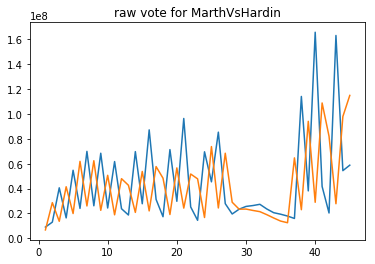

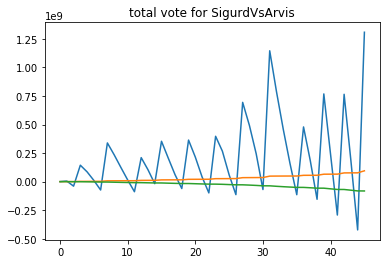

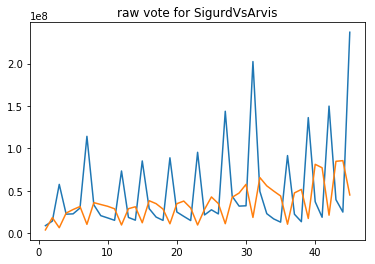

In [11]:
for name,df in df_dict.items():
    plt.plot(df['AT'] - df['BT'])
    plt.plot(df['AT']*0.01)
    plt.plot(-df['BT']*0.01)
    plt.title('total vote for '+name)
    plt.show()
    
    plt.plot(df['AR'])
    plt.plot(df['BR'])
    plt.title('raw vote for '+name)
    plt.show()

我们定义此raw投票量符合乘性模型（懒得写一般似然模型）：

$$
v_{it} = a b_i M_i T_t \epsilon_{it}
$$

$i$表示第$i$个人，我们把不同duel中的同一个人物当成不同的人物。因为它们参数不一样，一个玩家会在输掉一个duel后支持另一个人。
现在一共有六场duel共12人。$t$为该人物在对应比赛的时间$t=1,\dots,45$。因变量$v_{it}$为raw票数。$a$为标准化系数，
$b_i$为投票基数系数，$M_i$为乘子系数，当对应轮受到加成时取某个值，否则取$1$，$T_t$为时间系数，account for 玩家在越到后面
raw投票数越多以及时区玩家数量差异等因素。$\epsilon_{it}$为独立的乘性白噪声，服从某一对数正态分布。

我们试图估计

$$
\log v_{it} = \log a + \log b_i + \log M_i + \log T_t + \log \epsilon_{it}
$$



In [12]:
import statsmodels.api  as sm
import statsmodels.formula.api as smf

D:\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [13]:
df_dict.keys()

dict_keys(['EphraimVsLyon', 'HardinVsSigurd', 'IkeVsZelgius', 'LyonVsIke', 'MarthVsHardin', 'SigurdVsArvis'])

In [14]:
df_list = []
for df_name,df in df_dict.items():
    for X in ['A','B']:
        name = df_name+'As'+df_name.split('Vs')[0 if X == 'A' else 1]
        ddf = pd.DataFrame(dict(logrv = np.log(list(df[1:][X+'R'])), # some strange bug occur if call np.log directly
                                bonus = df[X+'B'].shift()[1:],
                                time = range(1,46)))
        ddf['name'] = name
        df_list.append(ddf)



In [15]:
df_list[0].head()

,bonus,logrv,time,name
1,False,16.428916,1,EphraimVsLyonAsEphraim
2,False,16.844302,2,EphraimVsLyonAsEphraim
3,True,18.002376,3,EphraimVsLyonAsEphraim
4,False,17.214684,4,EphraimVsLyonAsEphraim
5,False,17.151396,5,EphraimVsLyonAsEphraim


In [16]:
df = pd.concat(df_list)

In [17]:
model = smf.ols('logrv ~ name ',data = df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  logrv   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     28.36
Date:                Sun, 08 Jul 2018   Prob (F-statistic):           1.13e-46
Time:                        11:25:54   Log-Likelihood:                -550.50
No. Observations:                 540   AIC:                             1125.
Df Residuals:                     528   BIC:                             1176.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         17.6379      0.101    174.451      0.000      17.439      17.836
name[T.EphraimVsLyonAsLyon]       -0.3485      0.143     -2.438      0.015      -0.629      -0.068
name[T.HardinVsSigurdAsHardin]     0.4415      0.143      3.088      0.002       0.161       0.722
name[T.HardinVsSigurdAsSigurd]     0.5390      0.143      3.769      0.000       0.258       0.820
name[T.IkeVsZelgiusAsIke]          0.4202      0.143      2.939      0.003       0.139       0.701
name[T.IkeVsZelgiusAsZelgius]     -0.0383      0.143     -0.268      0.789      -0.319       0.243
name[T.LyonVsIkeAsIke]             1.2707      0.143      8.887      0.000       0.990       1.552
name[T.LyonVsIkeAsLyon]            0.7447      0.143      5.208      0.000       0.464       1.026
name[T.MarthVsHardinAsHardin]     -0.3121      0.143     -2.183      0.029      -0.593      -0.031
name[T.MarthVsHardinAsMarth]      -0.2667      0.143     -1.865      0.063      -0.548       0.014
name[T.SigurdVsArvisAsArvis]      -0.4684      0.143     -3.276      0.001      -0.749      -0.187
name[T.SigurdVsArvisAsSigurd]     -0.2912      0.143     -2.036      0.042      -0.572      -0.010
==============================================================================
Omnibus:                       10.292   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.634
Skew:                           0.334   Prob(JB):                      0.00491
Kurtosis:                       2.836   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model = smf.ols('logrv ~ name +  C(bonus) + C(time)',data = df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  logrv   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     108.2
Date:                Sun, 08 Jul 2018   Prob (F-statistic):          5.83e-238
Time:                        11:25:54   Log-Likelihood:                 27.718
No. Observations:                 540   AIC:                             58.56
Df Residuals:                     483   BIC:                             303.2
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         16.7640      0.078    213.630      0.000      16.610      16.918
name[T.EphraimVsLyonAsLyon]       -1.0374      0.053    -19.584      0.000      -1.141      -0.933
name[T.HardinVsSigurdAsHardin]     0.1109      0.052      2.147      0.032       0.009       0.212
name[T.HardinVsSigurdAsSigurd]     0.4839      0.051      9.441      0.000       0.383       0.585
name[T.IkeVsZelgiusAsIke]          0.4478      0.051      8.738      0.000       0.347       0.548
name[T.IkeVsZelgiusAsZelgius]     -0.6169      0.052    -11.759      0.000      -0.720      -0.514
name[T.LyonVsIkeAsIke]             1.2982      0.051     25.335      0.000       1.198       1.399
name[T.LyonVsIkeAsLyon]            0.0558      0.053      1.054      0.292      -0.048       0.160
name[T.MarthVsHardinAsHardin]     -0.6427      0.052    -12.446      0.000      -0.744      -0.541
name[T.MarthVsHardinAsMarth]      -0.4045      0.051     -7.883      0.000      -0.505      -0.304
name[T.SigurdVsArvisAsArvis]      -1.1021      0.053    -20.909      0.000      -1.206      -0.999
name[T.SigurdVsArvisAsSigurd]     -0.3738      0.051     -7.292      0.000      -0.475      -0.273
C(bonus)[T.True]                   1.2399      0.024     51.296      0.000       1.192       1.287
C(time)[T.2]                       0.0715      0.100      0.715      0.475      -0.125       0.268
C(time)[T.3]                       0.2592      0.100      2.593      0.010       0.063       0.456
C(time)[T.4]                       0.3647      0.100      3.648      0.000       0.168       0.561
C(time)[T.5]                       0.4298      0.100      4.299      0.000       0.233       0.626
C(time)[T.6]                       0.6432      0.100      6.435      0.000       0.447       0.840
C(time)[T.7]                       0.7266      0.100      7.269      0.000       0.530       0.923
C(time)[T.8]                       0.6802      0.100      6.805      0.000       0.484       0.877
C(time)[T.9]                       0.6186      0.100      6.202      0.000       0.423       0.815
C(time)[T.10]                      0.5088      0.100      5.090      0.000       0.312       0.705
C(time)[T.11]                      0.4363      0.100      4.375      0.000       0.240       0.632
C(time)[T.12]                      0.4016      0.100      4.027      0.000       0.206       0.598
C(time)[T.13]                      0.3217      0.100      3.225      0.001       0.126       0.518
C(time)[T.14]                      0.3932      0.100      3.934      0.000       0.197       0.590
C(time)[T.15]                      0.5769      0.100      5.771      0.000       0.380       0.773
C(time)[T.16]                      0.6501      0.100      6.504      0.000       0.454       0.847
C(time)[T.17] 

In [19]:
sigma = np.sqrt(res.mse_resid)
sigma

0.24304894090077125

In [20]:
np.sum(res.resid**2)/res.df_resid,res.mse_resid

(0.05907278767298659, 0.0590727876729866)

In [21]:
a = np.exp(res.params['Intercept'])
a

19077794.545179877

In [22]:
bonus = {False:1.0,True:np.exp(res.params['C(bonus)[T.True]'])}
bonus

{False: 1.0, True: 3.4551891430684236}

In [23]:
time = {i:np.exp(res.params[f'C(time)[T.{i}]']) for i in range(2,46)}
time[1] = 1.0
time

{1: 1.0,
 2: 1.0741378913294433,
 3: 1.295866618087283,
 4: 1.4400640625406806,
 5: 1.5368783354069948,
 6: 1.9026023207341458,
 7: 2.068025787622871,
 8: 1.9741967200562727,
 9: 1.8562543070818855,
 10: 1.6633001037029773,
 11: 1.54695412340533,
 12: 1.4942616453631625,
 13: 1.379430466681431,
 14: 1.4817032177895326,
 15: 1.7805092941189538,
 16: 1.9157966753081135,
 17: 1.7173878121704855,
 18: 1.5363931401927338,
 19: 1.598340286607526,
 20: 1.7630209318237142,
 21: 1.8352405302461576,
 22: 1.4220516088139272,
 23: 1.361140042527706,
 24: 1.3443816223802239,
 25: 2.263974654148134,
 26: 2.0492740876958595,
 27: 2.014562777289451,
 28: 2.0455072904365736,
 29: 2.140030482949336,
 30: 2.3962876005350275,
 31: 2.8176888006599934,
 32: 2.944968506869714,
 33: 2.14594034023668,
 34: 1.882317679707194,
 35: 1.607505696075166,
 36: 1.59312341452239,
 37: 1.8124083188811178,
 38: 1.8736727373101456,
 39: 2.2384262804144477,
 40: 2.584050044017198,
 41: 2.5389317112830643,
 42: 2.1256090826

In [24]:
def simulate(base_A, base_B, start_A = 0.0, start_B=0.0, start_turn=1, end_turn=46):
    # In Hardin Vs Sigurd, base_A(Hardin) = exp(0.1109) base_B(Sigurd) = exp(0.4839)
    AT = start_A
    BT = start_B
    
    
    record_list = []
    
    for turn in range(start_turn,end_turn):
        
        mult = 3.0 + 0.1 * turn
        
        if AT - BT <0 and abs(AT - BT) > AT * 0.01:
            AB = True
        else:
            AB = False
        if BT - AT <0 and abs(BT - AT) > BT * 0.01:
            BB = True
        else:
            BB = False
        
        epsilon_A = np.exp(np.random.randn() * sigma)
        epsilon_B = np.exp(np.random.randn() * sigma)
        
        AR = a * base_A * time[turn] * bonus[AB] * epsilon_A
        BR = a * base_B * time[turn] * bonus[BB] * epsilon_B
        
        AM = mult if AB else 1.0
        BM = mult if BB else 1.0
        
        AH = AR * AM
        BH = BR * BM
        
        AT += AH
        BT += BH
        
        record = {'Mult': mult, 
                  'AB':AB, 'BB':BB,
                  'AR':AR, 'BR':BR,
                  'AM':AM, 'BM':BM,
                  'AH':AH, 'BH':BH,
                  'AT':AT, 'BT':BT}
        record_list.append(record)
        
    df = pd.DataFrame(record_list)
    df[['Mult','AB','BB']] = df[['Mult','AB','BB']].shift(-1) # align to origin table format
    
    return df

def simulate_with_head(base_A, base_B, start_A = 0.0, start_B=0.0, start_turn=1, end_turn=46, before=None):
    df_sim_after = simulate(base_A, base_B, 
                            start_A = start_A, start_B=start_B, 
                            start_turn = start_turn, end_turn = end_turn)
    if before is None:
        df_sim_before = df_dict['HardinVsSigurd'][:1] 
    else:
        df_sim_before = before
    df_sim = pd.concat([df_sim_before, df_sim_after],ignore_index =True)
    return df_sim

In [25]:
df_sim_after = simulate(np.exp(0.1109), np.exp(0.4839))
df_sim_before = df_dict['HardinVsSigurd'][:1]
df_sim = pd.concat([df_sim_before, df_sim_after])

In [26]:
def examine_trace(df, name = None):
    plt.plot(df['AT'] - df['BT'])
    #plt.plot(df['AT']*0.01)
    #plt.plot(-df['BT']*0.01)
    plt.plot(-df['AT']*0.01)
    plt.plot(df['BT']*0.01)
    if name is not None:
        plt.title('total vote for '+name)
    plt.show()
    
    plt.plot(df['AR'])
    plt.plot(df['BR'])
    if name is not None:
        plt.title('raw vote for '+name)
    plt.show()

In [27]:
df_sim

,AB,AH,AM,AR,AT,BB,BH,BM,BR,BT,Mult
0,False,0.000000e+00,1,NaN,0.000000e+00,False,0.000000e+00,1,NaN,0.000000e+00,3.1
0,True,2.770974e+07,1,2.77097e+07,2.770974e+07,False,5.285142e+07,1,5.28514e+07,5.285142e+07,3.2
1,False,2.999899e+08,3.2,9.37469e+07,3.276997e+08,True,2.489053e+07,1,2.48905e+07,7.774196e+07,3.3
2,True,3.796249e+07,1,3.79625e+07,3.656621e+08,False,8.838093e+08,3.3,2.67821e+08,9.615513e+08,3.4
3,True,2.567258e+08,3.4,7.55076e+07,6.223879e+08,False,3.980527e+07,1,3.98053e+07,1.001357e+09,3.5
4,True,3.363826e+08,3.5,9.61093e+07,9.587706e+08,False,3.769473e+07,1,3.76947e+07,1.039051e+09,3.6
5,False,3.681060e+08,3.6,1.02252e+08,1.326877e+09,True,7.743401e+07,1,7.7434e+07,1.116485e+09,3.7
6,True,7.421013e+07,1,7.42101e+07,1.401087e+09,False,6.559659e+08,3.7,1.77288e+08,1.772451e+09,3.8
7,True,3.411234e+08,3.8,8.97693e+07,1.742210e+09,False,5.814058e+07,1,5.81406e+07,1.830592e+09,3.9
8,False,4.522080e+08,3.9,1.15951e+08,2.194418e+09,True,6.796986e+07,1,6.79699e+07,1.898562e+09,4.0


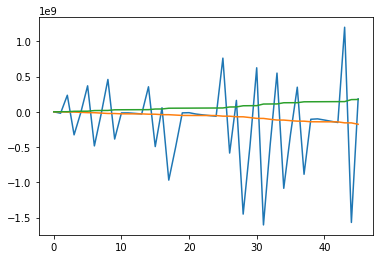

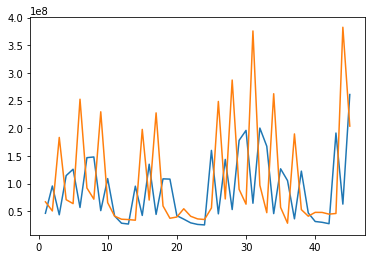

In [28]:
examine_trace(df_dict['HardinVsSigurd'])

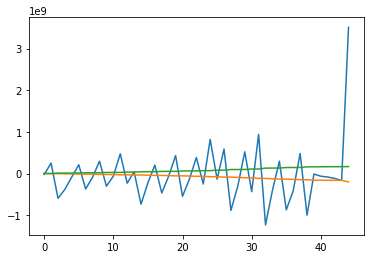

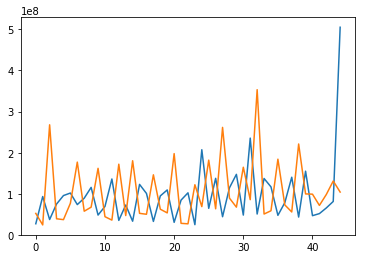

In [29]:
examine_trace(df_sim)

In [30]:
sim_f = lambda :simulate_with_head(np.exp(0.1109), np.exp(0.4839))

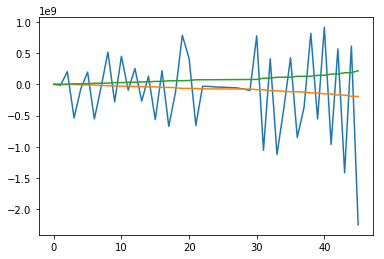

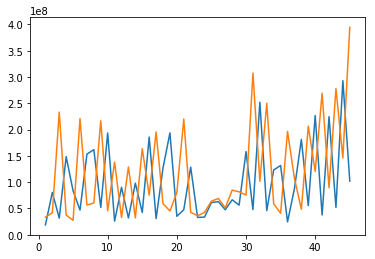

In [31]:
examine_trace(sim_f())

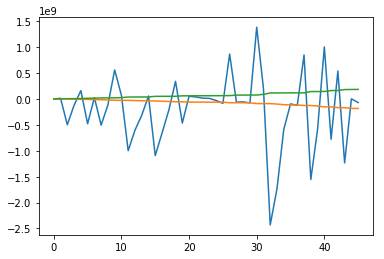

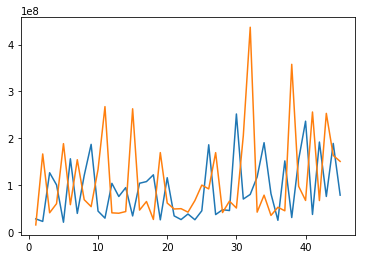

In [32]:
examine_trace(sim_f())

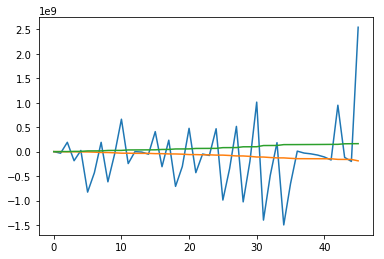

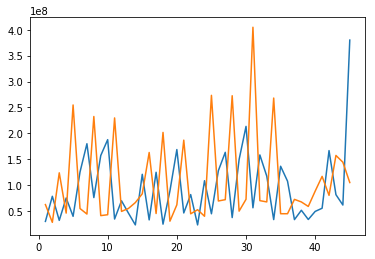

In [33]:
examine_trace(sim_f())

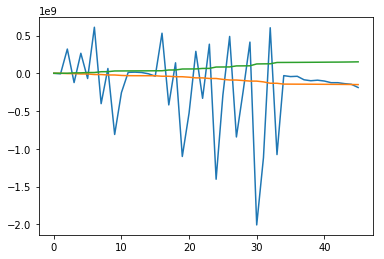

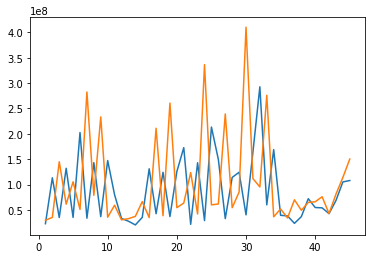

In [34]:
examine_trace(sim_f())

In [35]:
AF_list = []
BF_list = []

for i in range(1000):
    df = sim_f()
    
    AF = list(df['AT'])[-1]
    BF = list(df['BT'])[-1]
    
    AF_list.append(AF)
    BF_list.append(BF)

In [36]:
np.mean((np.array(AF_list) - np.array(BF_list)) >0)

0.426

In [37]:
AF_list = []
BF_list = []

for i in range(1000):
    df = sim_f()
    
    AF = list(df['AT'])[-1]
    BF = list(df['BT'])[-1]
    
    AF_list.append(AF)
    BF_list.append(BF)

In [38]:
np.mean((np.array(AF_list) - np.array(BF_list)) >0)

0.406

In [39]:
def predict_prob_win_A(base_A, base_B, *args, step=1000, **kwargs):
    sim_f = lambda :simulate_with_head(base_A, base_B, *args, **kwargs)
    
    AF_list = []
    BF_list = []

    for i in range(1000):
        df = sim_f()

        AF = list(df['AT'])[-1]
        BF = list(df['BT'])[-1]

        AF_list.append(AF)
        BF_list.append(BF)
        
    return np.mean((np.array(AF_list) - np.array(BF_list)) >0)

In [40]:
predict_prob_win_A(np.exp(0.1109), np.exp(0.4839))

0.452

In [41]:
res.params.get('asdasd',1)

1

In [42]:
for name in df_dict.keys():
    name_A,name_B = name.split('Vs')
    logb_A = res.params.get(f'name[T.{name}As{name_A}]', 0.0)
    logb_B = res.params.get(f'name[T.{name}As{name_B}]', 0.0)
    base_A = np.exp(logb_A)
    base_B = np.exp(logb_B)
    
    win_p = predict_prob_win_A(base_A, base_B,step=100)
    print(f'{name} {name_A} {logb_A} {name_B} {logb_B}: prob(winner={name_A}) = {win_p}')

EphraimVsLyon Ephraim 0.0 Lyon -1.0373576748921836: prob(winner=Ephraim) = 0.703
HardinVsSigurd Hardin 0.11086253424501663 Sigurd 0.48385864019737446: prob(winner=Hardin) = 0.402
IkeVsZelgius Ike 0.44777669710003926 Zelgius -0.616946765028162: prob(winner=Ike) = 0.719
LyonVsIke Lyon 0.05584823620969198 Ike 1.2982073826352885: prob(winner=Lyon) = 0.306
MarthVsHardin Marth -0.40447805168719325 Hardin -0.6427460515837075: prob(winner=Marth) = 0.584
SigurdVsArvis Sigurd -0.3738141798670118 Arvis -1.1020751779811917: prob(winner=Sigurd) = 0.686


In [43]:
for name in df_dict.keys():
    name_A,name_B = name.split('Vs')
    logb_A = res.params.get(f'name[T.{name}As{name_A}]', 0.0)
    logb_B = res.params.get(f'name[T.{name}As{name_B}]', 0.0)
    base_A = np.exp(logb_A)
    base_B = np.exp(logb_B)
    
    win_p = predict_prob_win_A(base_A, base_B,step=1000)
    print(f'{name} {name_A} {logb_A} {name_B} {logb_B}: prob(winner={name_A}) = {win_p}')

EphraimVsLyon Ephraim 0.0 Lyon -1.0373576748921836: prob(winner=Ephraim) = 0.702
HardinVsSigurd Hardin 0.11086253424501663 Sigurd 0.48385864019737446: prob(winner=Hardin) = 0.391
IkeVsZelgius Ike 0.44777669710003926 Zelgius -0.616946765028162: prob(winner=Ike) = 0.718
LyonVsIke Lyon 0.05584823620969198 Ike 1.2982073826352885: prob(winner=Lyon) = 0.284
MarthVsHardin Marth -0.40447805168719325 Hardin -0.6427460515837075: prob(winner=Marth) = 0.575
SigurdVsArvis Sigurd -0.3738141798670118 Arvis -1.1020751779811917: prob(winner=Sigurd) = 0.67


In [44]:
np.exp(0.0)/ np.exp(-1.0373576748921836)

2.8217511711353698

In [45]:
print('first turn approx')
for name in df_dict.keys():
    name_A,name_B = name.split('Vs')
    logb_A = res.params.get(f'name[T.{name}As{name_A}]', 0.0)
    logb_B = res.params.get(f'name[T.{name}As{name_B}]', 0.0)
    base_A = np.exp(logb_A)
    base_B = np.exp(logb_B)
    first_A = list(df_dict[name]['AT'])[1]
    first_B = list(df_dict[name]['BT'])[1]
    
    print(f'name:{name_A} / {name_B} base: {base_A/base_B} first vote: {first_A/first_B}')


first turn approx
name:Ephraim / Lyon base: 2.8217511711353698 first vote: 3.0180046021713895
name:Hardin / Sigurd base: 0.6886679145444032 first vote: 0.6917118493242456
name:Ike / Zelgius base: 2.9000369031285396 first vote: 2.1887683344180084
name:Lyon / Ike base: 0.2887023228571096 first vote: 0.24051755074786318
name:Marth / Hardin base: 1.2690492523232142 first vote: 1.33758570393314
name:Sigurd / Arvis base: 2.0714751744203697 first vote: 2.2680057133647162


In [46]:
print('odds approx')
base_S = 1.0
first_S = 13645437
for name in df_dict.keys():
    name_A,name_B = name.split('Vs')
    logb_A = res.params.get(f'name[T.{name}As{name_A}]', 0.0)
    logb_B = res.params.get(f'name[T.{name}As{name_B}]', 0.0)
    base_A = np.exp(logb_A)
    base_B = np.exp(logb_B)
    first_A = list(df_dict[name]['AT'])[1]
    first_B = list(df_dict[name]['BT'])[1]
    
    print(f'name:{name}-{name_A} / First Sigurd base: {base_A/base_S} first vote: {first_A/first_S}')
    print(f'name:{name}-{name_B} / First Sigurd base: {base_B/base_S} first vote: {first_B/first_S}')

odds approx
name:EphraimVsLyon-Ephraim / First Sigurd base: 1.0 first vote: 1.0
name:EphraimVsLyon-Lyon / First Sigurd base: 0.354389859116329 first vote: 0.33134475649259165
name:HardinVsSigurd-Hardin / First Sigurd base: 1.117241313877102 first vote: 3.396336372371218
name:HardinVsSigurd-Sigurd / First Sigurd base: 1.6223222982825136 first vote: 4.910045094195224
name:IkeVsZelgius-Ike / First Sigurd base: 1.564829225732101 first vote: 1.409060186199973
name:IkeVsZelgius-Zelgius / First Sigurd base: 0.5395894183429094 first vote: 0.6437685359582108
name:LyonVsIke-Lyon / First Sigurd base: 1.0574371908823164 first vote: 2.701049735526975
name:LyonVsIke-Ike / First Sigurd base: 3.6627249147755716 first vote: 11.230156498469048
name:MarthVsHardin-Marth / First Sigurd base: 0.667325029147652 first vote: 0.6582030315335449
name:MarthVsHardin-Hardin / First Sigurd base: 0.5258464381315368 first vote: 0.49208288455694016
name:SigurdVsArvis-Sigurd / First Sigurd base: 0.6881047636685833 first

In [47]:
df_dict.keys()

dict_keys(['EphraimVsLyon', 'HardinVsSigurd', 'IkeVsZelgius', 'LyonVsIke', 'MarthVsHardin', 'SigurdVsArvis'])

In [48]:
df = process_csv('(July 2018) FEH Voting Gauntlet_ Fated Battles - Hardin vs Lyon.csvx')

In [49]:
cutoff = 31
before = df[:cutoff]
before.head()

,AT,BT,AH,BH,AB,BB,Mult,AM,BM,AR,BR
0,0,0,0,0,False,False,3.1,1,1,NaN,NaN
1,171173279,189182643,171173279,189182643,True,False,3.2,3.2,1,1.71173e+08,1.89183e+08
2,1303451058,326637187,1132277779,137454544,False,True,3.3,1,3.3,3.53837e+08,1.37455e+08
3,1461146055,1640594656,157694997,1313957469,True,False,3.4,3.4,1,1.57695e+08,3.98169e+08
4,2857368705,1811263508,1396222650,170668852,False,True,3.5,1,3.5,4.10654e+08,1.70669e+08


In [50]:
171173279 / 189182643

0.9048043535368094

In [51]:
df_dict['EphraimVsLyon'].head()

,AT,BT,AH,BH,AB,BB,Mult,AM,BM,AR,BR
0,0,0,0,0,False,False,3.1,1,1,NaN,NaN
1,13645437,4521344,13645437,4521344,False,True,3.2,1,3.2,1.36454e+07,4.52134e+06
2,34317680,65784543,20672243,61263199,True,False,3.3,3.3,1,2.06722e+07,1.91447e+07
3,251510931,73585064,217193251,7800521,False,True,3.4,1,3.4,6.58161e+07,7.80052e+06
4,281450270,158009709,29939339,84424645,False,True,3.5,1,3.5,2.99393e+07,2.48308e+07


In [52]:
171173279 /13645437,189182643/13645437

(12.544360360170216, 13.864168879311084)

In [53]:
before.tail()

,AT,BT,AH,BH,AB,BB,Mult,AM,BM,AR,BR
26,14408028390,14528982185,177293431,191554175,False,False,5.7,1,1,1.77293e+08,1.91554e+08
27,14573713465,14707692027,165685075,178709842,False,False,5.8,1,1,1.65685e+08,1.7871e+08
28,14740467545,14886927535,166754080,179235508,False,False,5.9,1,1,1.66754e+08,1.79236e+08
29,14927220270,15095508854,186752725,208581319,True,False,6.0,6,1,1.86753e+08,2.08581e+08
30,19173206465,15291271104,4245986195,195762250,False,True,6.1,1,6.1,7.07664e+08,1.95762e+08


In [54]:
simulate_with_head(12.544360360170216, 13.864168879311084,
                                 start_A = 19173206465.0, start_B=15291271104.0, start_turn=31, end_turn=46, before=before)

,AB,AH,AM,AR,AT,BB,BH,BM,BR,BT,Mult
0,False,0.000000e+00,1,NaN,0.000000e+00,False,0.000000e+00,1,NaN,0.000000e+00,3.1
1,True,1.711733e+08,3.2,1.71173e+08,1.711733e+08,False,1.891826e+08,1,1.89183e+08,1.891826e+08,3.2
2,False,1.132278e+09,1,3.53837e+08,1.303451e+09,True,1.374545e+08,3.3,1.37455e+08,3.266372e+08,3.3
3,True,1.576950e+08,3.4,1.57695e+08,1.461146e+09,False,1.313957e+09,1,3.98169e+08,1.640595e+09,3.4
4,False,1.396223e+09,1,4.10654e+08,2.857369e+09,True,1.706689e+08,3.5,1.70669e+08,1.811264e+09,3.5
5,True,1.907400e+08,3.6,1.9074e+08,3.048109e+09,False,1.704222e+09,1,4.86921e+08,3.515485e+09,3.6
6,False,1.856731e+09,1,5.15759e+08,4.904840e+09,True,2.209673e+08,3.7,2.20967e+08,3.736453e+09,3.7
7,True,2.236573e+08,3.8,2.23657e+08,5.128497e+09,False,2.127806e+09,1,5.75083e+08,5.864259e+09,3.8
8,False,2.027685e+09,1,5.33601e+08,7.156181e+09,True,2.361539e+08,3.9,2.36154e+08,6.100413e+09,3.9
9,True,2.047398e+08,4,2.0474e+08,7.360921e+09,False,2.145182e+09,1,5.50047e+08,8.245595e+09,4.0


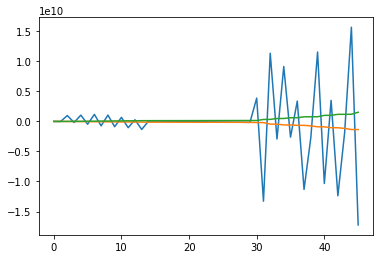

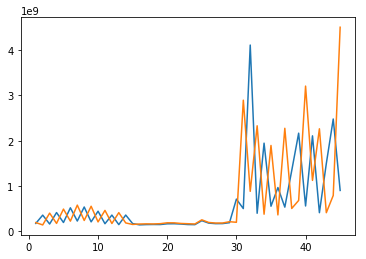

In [55]:
examine_trace(simulate_with_head(12.544360360170216, 13.864168879311084,
                                 start_A = 19173206465.0, start_B=15291271104.0, start_turn=31, end_turn=46, before=before))

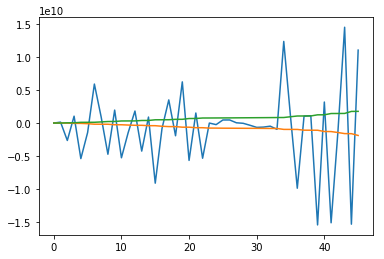

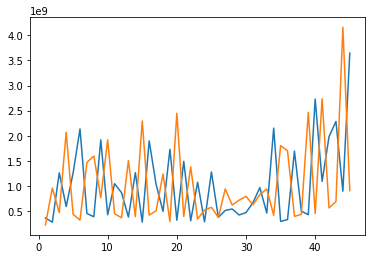

In [56]:
examine_trace(simulate_with_head(12.544360360170216, 13.864168879311084))

In [57]:
before

,AT,BT,AH,BH,AB,BB,Mult,AM,BM,AR,BR
0,0,0,0,0,False,False,3.1,1,1,NaN,NaN
1,171173279,189182643,171173279,189182643,True,False,3.2,3.2,1,1.71173e+08,1.89183e+08
2,1303451058,326637187,1132277779,137454544,False,True,3.3,1,3.3,3.53837e+08,1.37455e+08
3,1461146055,1640594656,157694997,1313957469,True,False,3.4,3.4,1,1.57695e+08,3.98169e+08
4,2857368705,1811263508,1396222650,170668852,False,True,3.5,1,3.5,4.10654e+08,1.70669e+08
5,3048108709,3515485292,190740004,1704221784,True,False,3.6,3.6,1,1.9074e+08,4.86921e+08
6,4904839596,3736452605,1856730887,220967313,False,True,3.7,1,3.7,5.15759e+08,2.20967e+08
7,5128496919,5864258894,223657323,2127806289,True,False,3.8,3.8,1,2.23657e+08,5.75083e+08
8,7156181420,6100412768,2027684501,236153874,False,True,3.9,1,3.9,5.33601e+08,2.36154e+08
9,7360921174,8245595011,204739754,2145182243,True,False,4.0,4,1,2.0474e+08,5.50047e+08


In [58]:
df_name = 'HardinVsLyon'
df = before

_df_list = []
for X in ['A','B']:
    name = df_name+'As'+df_name.split('Vs')[0 if X == 'A' else 1]
    ddf = pd.DataFrame(dict(logrv = np.log(list(df[1:][X+'R'])), # some strange bug occur if call np.log directly
                            bonus = df[X+'B'].shift()[1:],
                            time = range(1,cutoff)))
    ddf['name'] = name
    _df_list.append(ddf)

df = pd.concat(_df_list)

In [59]:
df['bonus_value'] = np.array(list(df['bonus'])) * np.log(bonus[True])
df['time_value'] = np.log(pd.Series(time))[df['time']]
df['logrv_controled'] = df['logrv'] - df['bonus_value'] - df['time_value'] - np.log(a)
df['myname'] = df['name']

In [60]:
df.head()

,bonus,logrv,time,name,bonus_value,time_value,logrv_controled,myname
1,False,18.958187,1,HardinVsLyonAsHardin,0.000000,0.000000,2.194151,HardinVsLyonAsHardin
2,True,19.684346,2,HardinVsLyonAsHardin,1.239877,0.071518,1.608915,HardinVsLyonAsHardin
3,False,18.876173,3,HardinVsLyonAsHardin,0.000000,0.259180,1.852958,HardinVsLyonAsHardin
4,True,19.833261,4,HardinVsLyonAsHardin,1.239877,0.364688,1.464660,HardinVsLyonAsHardin
5,False,19.066422,5,HardinVsLyonAsHardin,0.000000,0.429753,1.872633,HardinVsLyonAsHardin


In [61]:
model2 = smf.ols('logrv_controled ~ name -1',data=df)
res2 = model2.fit()
#res3 = res2.get_robustcov_results(cov_type='HAC',maxlags=1)
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        logrv_controled   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     3.428
Date:                Sun, 08 Jul 2018   Prob (F-statistic):             0.0692
Time:                        11:28:31   Log-Likelihood:                 15.075
No. Observations:                  60   AIC:                            -26.15
Df Residuals:                      58   BIC:                            -21.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
name[HardinVsLyonAsHardin]     1.5906      0.035     45.511      0.000       1.521       1.661
name[HardinVsLyonAsLyon]       1.6821      0.035     48.130      0.000       1.612       1.752
==============================================================================
Omnibus:                       12.728   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.051
Skew:                           0.934   Prob(JB):                     0.000889
Kurtosis:                       4.461   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

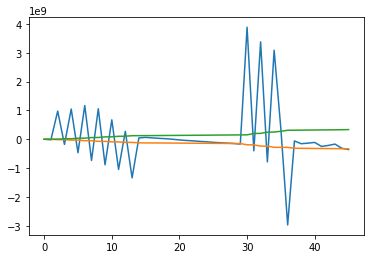

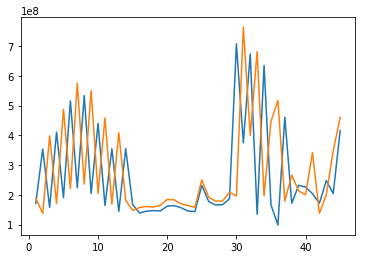

In [62]:
examine_trace(simulate_with_head(np.exp(1.5906), np.exp(1.6821),
                                 start_A = 19173206465.0, start_B=15291271104.0, start_turn=31, end_turn=46, before=before))

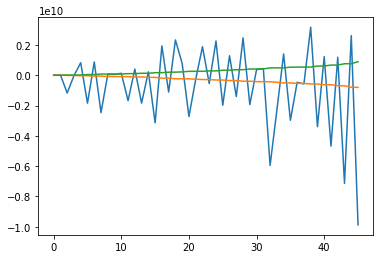

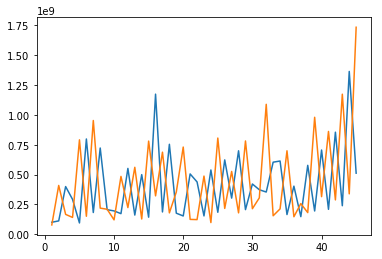

In [63]:
examine_trace(simulate_with_head(np.exp(1.5906), np.exp(1.6821)))

In [64]:
predict_prob_win_A(np.exp(1.5906), np.exp(1.6821),
                   start_A = 19173206465.0, start_B=15291271104.0, start_turn=31, end_turn=46, before=before)

0.491

In [65]:
predict_prob_win_A(np.exp(1.5906), np.exp(1.6821),
                   start_A = 19173206465.0, start_B=15291271104.0, start_turn=31, end_turn=46, before=before)

0.485

In [66]:
predict_prob_win_A(np.exp(1.5906), np.exp(1.6821),
                   start_A = 19173206465.0, start_B=15291271104.0, start_turn=31, end_turn=46, before=before)

0.458

In [67]:
predict_prob_win_A(np.exp(1.5906), np.exp(1.6821),
                   start_A = 19173206465.0, start_B=15291271104.0, start_turn=31, end_turn=46, before=before,step=2000)

0.482

In [68]:
df_dict['LyonVsIke']

,AT,BT,AH,BH,AB,BB,Mult,AM,BM,AR,BR
0,0,0,0,0,False,False,3.1,1,1,NaN,NaN
1,36857004,153240393,36857004,153240393,True,False,3.2,3.2,1,3.6857e+07,1.5324e+08
2,275305469,266576132,238448465,113335739,False,True,3.3,1,3.3,7.45151e+07,1.13336e+08
3,307103431,1365519069,31797962,1098942937,True,False,3.4,3.4,1,3.1798e+07,3.33013e+08
4,596522873,1506231291,289419442,140712222,True,False,3.5,3.5,1,8.51234e+07,1.40712e+08
5,918202402,1636046085,321679529,129814794,True,False,3.6,3.6,1,9.19084e+07,1.29815e+08
6,1277154401,1779186665,358951999,143140580,True,False,3.7,3.7,1,9.97089e+07,1.43141e+08
7,1677741942,1933693198,400587541,154506533,True,False,3.8,3.8,1,1.08267e+08,1.54507e+08
8,2082936468,2091769415,405194526,158076217,False,False,3.9,1,1,1.0663e+08,1.58076e+08
9,2125616619,2248211684,42680151,156442269,True,False,4.0,4,1,4.26802e+07,1.56442e+08


In [69]:
predict_prob_win_A(np.exp(0.0558), np.exp(1.2982),
                   start_A = 11284169269.0, start_B=10810936039.0, start_turn=31, end_turn=46, before=before,step=2000)

0.304

In [70]:
df_dict['EphraimVsLyon']

,AT,BT,AH,BH,AB,BB,Mult,AM,BM,AR,BR
0,0,0,0,0,False,False,3.1,1,1,NaN,NaN
1,13645437,4521344,13645437,4521344,False,True,3.2,1,3.2,1.36454e+07,4.52134e+06
2,34317680,65784543,20672243,61263199,True,False,3.3,3.3,1,2.06722e+07,1.91447e+07
3,251510931,73585064,217193251,7800521,False,True,3.4,1,3.4,6.58161e+07,7.80052e+06
4,281450270,158009709,29939339,84424645,False,True,3.5,1,3.5,2.99393e+07,2.48308e+07
5,309553528,250219024,28103258,92209315,False,True,3.6,1,3.6,2.81033e+07,2.63455e+07
6,344160117,363337985,34606589,113118961,True,False,3.7,3.7,1,3.46066e+07,3.14219e+07
7,802983789,377071138,458823672,13733153,False,True,3.8,1,3.8,1.24006e+08,1.37332e+07
8,848576683,514684132,45592894,137612994,False,True,3.9,1,3.9,4.55929e+07,3.62139e+07
9,884216113,643798786,35639430,129114654,False,True,4.0,1,4,3.56394e+07,3.31063e+07


In [71]:
predict_prob_win_A(np.exp(0.0), np.exp(-1.0374),
                   start_A = 3636565938.0, start_B=3796963497.0, start_turn=31, end_turn=46, before=before,step=2000)

0.706

In [72]:
predict_prob_win_A(np.exp(0.0), np.exp(-1.0374),
                   start_A = 7832947090.0, start_B=8126289700.0, start_turn=43, end_turn=46, before=before,step=2000)

0.401

In [73]:
for i in range(30,44):
    loc = df_dict['EphraimVsLyon'].loc[i]
    p=predict_prob_win_A(np.exp(0.0), np.exp(-1.0374),
                   start_A = loc['AT'], start_B=loc['BT'], start_turn=i+1, end_turn=46, before=before,step=500)
    print(f'{i}:{p}')

30:0.712
31:0.748
32:0.725
33:0.74
34:0.753
35:0.719
36:0.776
37:0.783
38:0.758
39:0.721
40:0.873
41:0.703
42:0.339
43:0.273


In [74]:
for i in range(30,45):
    loc = df_dict['EphraimVsLyon'].loc[i]
    p=predict_prob_win_A(np.exp(0.0), np.exp(-1.0374),
                   start_A = loc['AT'], start_B=loc['BT'], start_turn=i+1, end_turn=46, before=before,step=2000)
    print(f'{i}:{p}')

30:0.717
31:0.765
32:0.737
33:0.749
34:0.743
35:0.727
36:0.763
37:0.785
38:0.789
39:0.716
40:0.861
41:0.725
42:0.368
43:0.249
44:0.002


In [75]:
for name in df_dict.keys():
    print(f'post hoc win prob of {name}')

    name_A,name_B = name.split('Vs')
    logb_A = res.params.get(f'name[T.{name}As{name_A}]', 0.0)
    logb_B = res.params.get(f'name[T.{name}As{name_B}]', 0.0)
    base_A = np.exp(logb_A)
    base_B = np.exp(logb_B)
    
    for i in range(30,45):
        loc = df_dict[name].loc[i]
        p=predict_prob_win_A(base_A, base_B,
                       start_A = loc['AT'], start_B=loc['BT'], start_turn=i+1, end_turn=46, before=before,step=2000)
        print(f'{i}:{p}')
    
    print('\n')

post hoc win prob of EphraimVsLyon
30:0.722
31:0.75
32:0.749
33:0.724
34:0.71
35:0.724
36:0.738
37:0.761
38:0.793
39:0.704
40:0.865
41:0.701
42:0.338
43:0.249
44:0.005


post hoc win prob of HardinVsSigurd
30:0.394
31:0.363
32:0.381
33:0.393
34:0.418
35:0.401
36:0.391
37:0.372
38:0.479
39:0.453
40:0.43
41:0.652
42:0.828
43:0.854
44:0.946


post hoc win prob of IkeVsZelgius
30:0.746
31:0.727
32:0.749
33:0.707
34:0.692
35:0.699
36:0.69
37:0.591
38:0.628
39:0.593
40:0.601
41:0.414
42:0.918
43:0.933
44:0.976


post hoc win prob of LyonVsIke
30:0.304
31:0.301
32:0.313
33:0.315
34:0.309
35:0.286
36:0.315
37:0.264
38:0.221
39:0.24
40:0.138
41:0.088
42:0.278
43:0.496
44:0.86


post hoc win prob of MarthVsHardin
30:0.563
31:0.55
32:0.572
33:0.524
34:0.509
35:0.529
36:0.517
37:0.511
38:0.57
39:0.557
40:0.671
41:0.812
42:0.885
43:0.672
44:0.0


post hoc win prob of SigurdVsArvis
30:0.692
31:0.655
32:0.665
33:0.671
34:0.671
35:0.672
36:0.646
37:0.683
38:0.719
39:0.599
40:0.832
41:0.795
42:0.845
43